   # Analysis of Rossmann Store Sales Prediction

![Image](http://4.bp.blogspot.com/-Mxr3ALOD5UA/VnBpraJWQ4I/AAAAAAAAAf0/iiabeX435Qw/s1600/rossmann.png)

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

In this notebook the objective is to use this time series data and apply regression alorithm to check the accuracy of sales.

TO check the accuracy algorithms we have used are :- 
* Linear Regression
* Random Forest
* Gradient Boosting
* XG Boosting

## Table of Contents
1. [Import Packages](#1-bullet) <br>
2. [Data Preparation](#2-bullet) <br>
2.1 [Load Dataset](#2.1-bullet) <br>
2.2 [Dealing With Missing Values](#2.2-bullet) <br>
2.3 [Date Extraction](#2.3-bullet) <br>
2.4 [Joining Tables](#2.4-bullet) <br>
2.5 [Feature Engineering](#2.6-bullet) <br>
3. [Exploratory Data Exploration](#3-bullet) <br>
3.1 [Correlation Heatmap](#3.1-bullet) <br>
3.2 [Sales Distribution over period](#3.2-bullet) <br>

4. [Sales Prediction](#4-bullet) <br>
4.2 [Data Preparation](#4.1-bullet) <br>
4.1 [Linear Regression](#4.2-bullet) <br>
4.2 [Random Forest Regression](#4.3-bullet) <br>
4.3 [Gradient Boost](#4.4-bullet) <br>
4.4 [XG Boosting](#4.5-bullet) <br>

5. [Conclusion](#5-bullet)
6. [Reference and citation](#6-bullet)

# 1. Import Packages <a class="anchor" id="1-bullet"></a>

In [2]:
import numpy as np
import pandas as pd
import math
# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

#plotting packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# 2. Data Preparation <a class="anchor" id="2-bullet"></a>

Data can be downloaded from https://www.kaggle.com/c/rossmann-store-sales

## 2.1 Load Dataset <a class="anchor" id="2.1-bullet"></a>

Import train , store and test data using pandas read method

put proper address of your datafile in read_csv function

datafile = pd.read_csv('address')

In [3]:
df_main = pd.read_csv('C:/Users/parag/Downloads/Rossmann-Store-Sales-Predictions/Rossmann-Store-Sales-Prediction/rossmann.csv')

c:\users\parag\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
df_store = pd.read_csv('C:/Users/parag/Downloads/Rossmann-Store-Sales-Predictions/Rossmann-Store-Sales-Predictions/store.csv')

In [9]:
df_test = pd.read_csv('C:/Users/parag/Downloads/Rossmann-Store-Sales-Predictions/Rossmann-Store-Sales-Predictions/test.csv')

<B>The table below will give a glance at the data and their summary</B>

In [7]:
df_main.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [10]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [17]:
df_main.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [14]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
Id               41088 non-null int64
Store            41088 non-null int64
DayOfWeek        41088 non-null int64
Date             41088 non-null object
Open             41077 non-null float64
Promo            41088 non-null int64
StateHoliday     41088 non-null object
SchoolHoliday    41088 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


Short description:
* Sales: The turnover for any given day (target variable).
* Customers: The number of customers on a given day.
* Open: Indicates whether store is open or not 
> open: 0 = closed, 1 = open.
* Promo: indicates whether a store is running a promo on that day.

* StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays.

* SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools.

* We are dealing with time series data so it will probably serve us to extract dates for further analysis. We also have two likely correlated vaiables in the dataset, which can be combined into a new feature.

## 2.2 Dealing with missing values<a class="anchor" id="2.2-bullet"></a>

In this section we will go through the training and testing dataset. We'll find out whether there are any missing values or not and later on handling those missing values.

In [44]:
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [10]:
df_main.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [15]:
df_test.fillna(1, inplace=True)

## 2.3 Date Extraction <a class="anchor" id="2.3-bullet"></a>

  ### Seperating data fields

    from Date field each i.e day , month and year are extracted and stored into another column

The Rossmann dataset is a time series dataset. We cannot directly use date as a predictor variable in non time-series algorithm. But we can split the 'Date' into three seperate entities day, month and year

In [20]:
df_main['Year'] = df_main['Date'].apply(lambda x: int(x[:4]))
df_main['Month'] = df_main['Date'].apply(lambda x: int(x[5:7]))
df_main['Day'] = df_main['Date'].apply(lambda x: int(x[8:]))

## 2.4 Joining Tables  <a class="anchor" id="2.4-bullet"></a>

We will will merge store data and training data
after merging if any null/NAN values are there then they will get filled.

In [21]:
df_main = df_main[df_main["Open"] != 0]
df_main = df_main[df_main["Sales"] > 0]
df_main['log_sales'] = np.log(df_main['Sales'])
df_main = pd.merge(df_main, df_store, on='Store')
test = pd.merge(df_test, df_store, on='Store')
df_main.fillna(0,inplace=True)
df_test.fillna(0,inplace=True)

In [22]:
df_main.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,log_sales,...,Assortment_x,CompetitionDistance_x,Promo2_x,Year,Month,Day,StoreType_y,Assortment_y,CompetitionDistance_y,Promo2_y
0,1,5,2015-07-31,5263,555,1,1,0,1,8.568456,...,a,1270.0,0,2015,7,31,c,a,1270.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,8.521185,...,a,1270.0,0,2015,7,30,c,a,1270.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,8.472614,...,a,1270.0,0,2015,7,29,c,a,1270.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,8.519391,...,a,1270.0,0,2015,7,28,c,a,1270.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,8.716372,...,a,1270.0,0,2015,7,27,c,a,1270.0,0


## 2.5 Feature Engineering <a class="anchor" id="2.5-bullet"></a>

State holiday has three inputs which are non numeric, we cannot diretly use those values. To make them more meaningful we'll encode them into numeric form

In [18]:
df_main["StateHoliday"] = df_main["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})
df_test["StateHoliday"] = df_test["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

In [19]:
df_main.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,log_sales,CompetitionDistance,Promo2
count,844338.000000,844338.000000,844338.000000,844338.000000,844338.0,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000
mean,558.421374,3.520350,6955.959134,762.777166,1.0,0.446356,0.001078,0.193578,8.757564,5444.025402,0.498670
std,321.730861,1.723712,3103.815515,401.194153,0.0,0.497114,0.032812,0.395102,0.425278,7804.387332,0.499999
min,1.000000,1.000000,46.000000,8.000000,1.0,0.000000,0.000000,0.000000,3.828641,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,1.0,0.000000,0.000000,0.000000,8.488588,700.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,1.0,0.000000,0.000000,0.000000,8.759198,2320.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.0,1.000000,0.000000,0.000000,9.031214,6880.000000,1.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.0,1.000000,1.000000,1.000000,10.634677,75860.000000,1.000000


## 3 Exploratory Data Analysis <a class="anchor" id="3-bullet"></a>

    After seperating the date we are visualizing the dataset to understand it more clearly

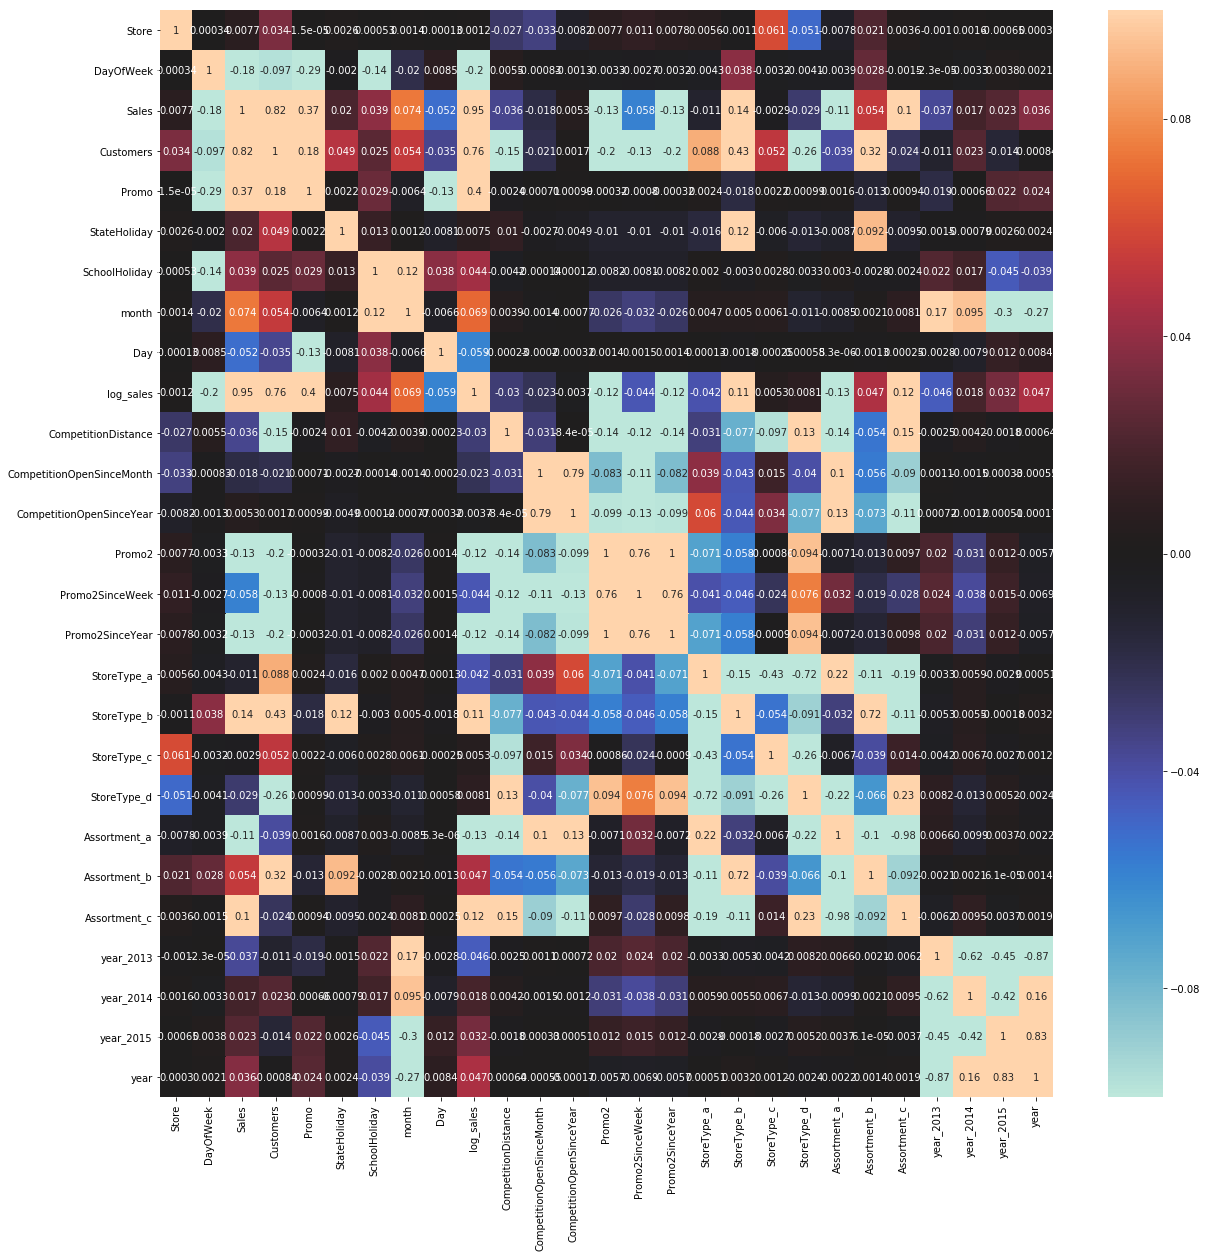

In [68]:
data_correlation = df_main_.drop(columns=['Open'])
plt.subplots(figsize=(20,20))
sns.heatmap(data_correlation.corr(),annot=True, vmin=-0.1, vmax=0.1,center=0)

c:\users\parag\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\parag\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\parag\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


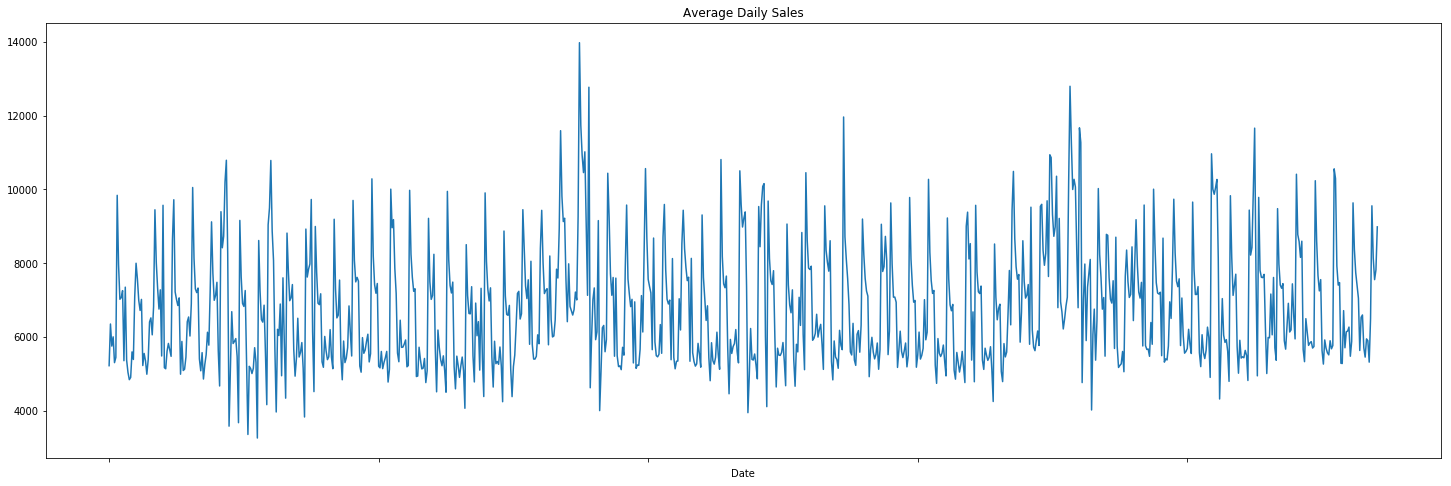

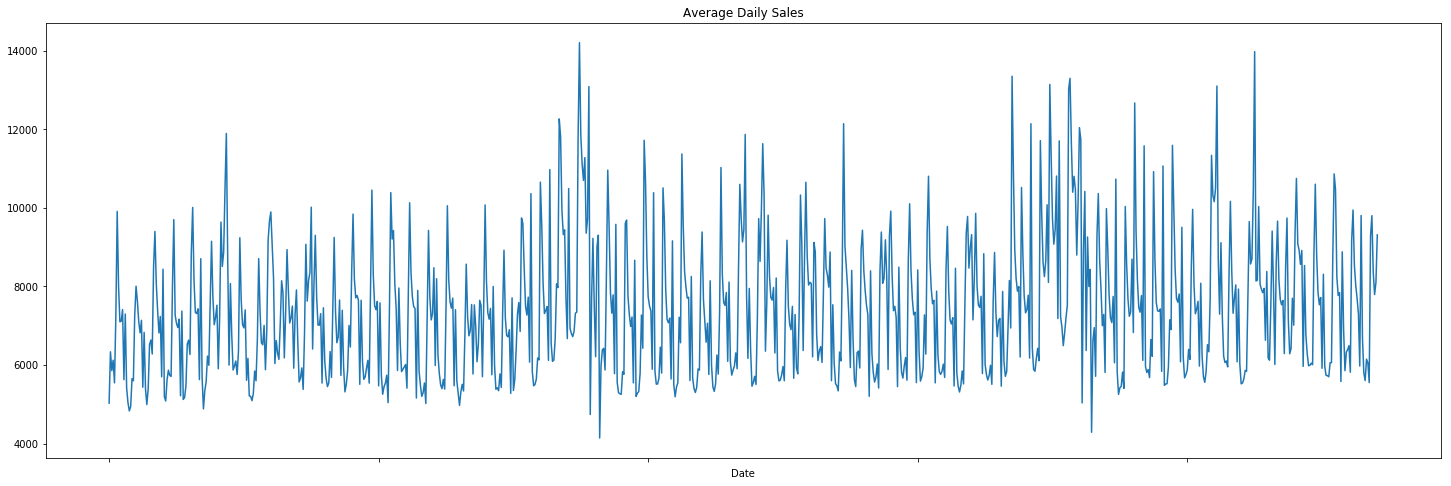

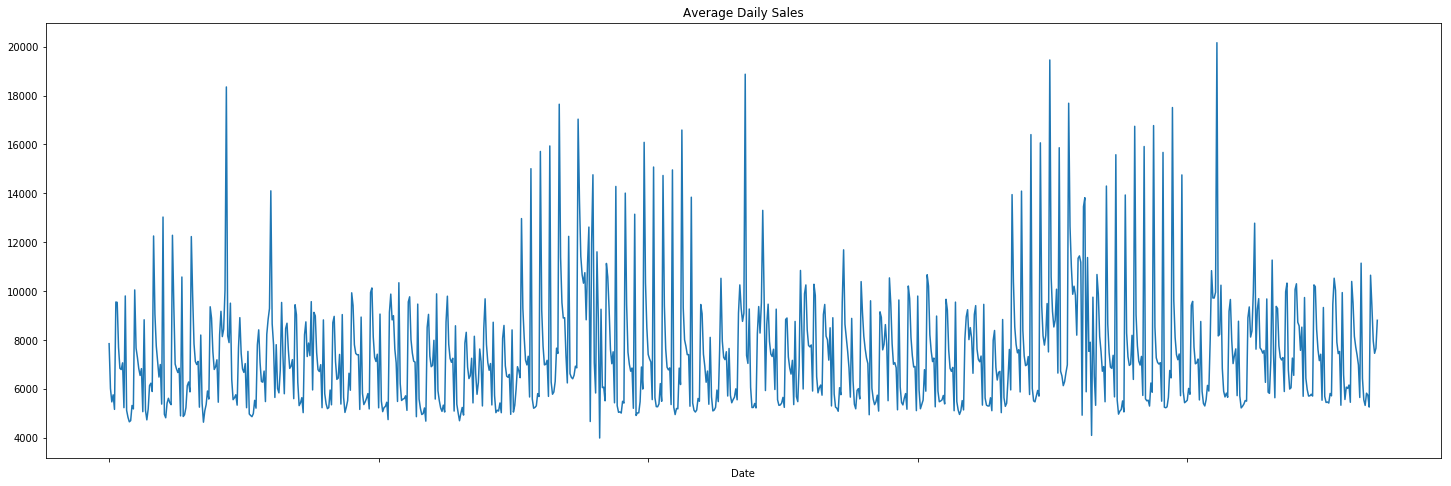

In [48]:
for temp_year in range (2013,2016):
    df_main_temp = df_main[df_main.Year == temp_year]
    average_daily_sales = df_main_temp.groupby('Date')["Sales"].mean()
    fig = plt.subplots(1,1,sharex=True,figsize=(25,8))
    average_daily_sales.plot(title="Average Daily Sales")

Text(0.5, 1.0, 'Total Working Days')

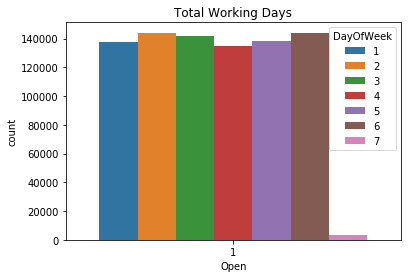

In [23]:
sns.countplot(x='Open',hue='DayOfWeek', data=df_main)
plt.title('Total Working Days')

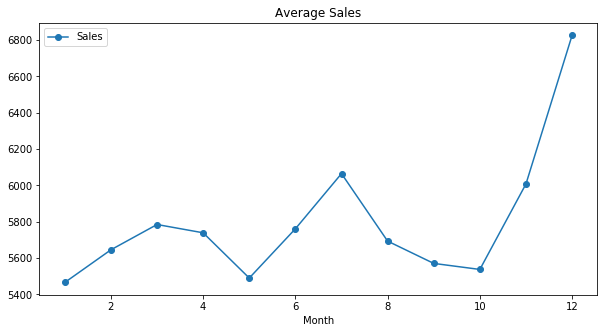

In [49]:
average_monthly_sales = df_main.groupby('Month')["Sales"].mean()
fig = plt.subplots(1,1,sharex=True,figsize=(10,5))
average_monthly_sales.plot(legend=True,marker='o',title="Average Sales")

#### Total Sales Every month and every year

In [3]:
def year_function(x):
    return int(str(x)[:4])

def month_function(x):
    return int(str(x)[5:7])

def date_function(x):
    return (str(x)[:7])

In [21]:
df_main['Date'] = df_main['Date'].apply(date_function)
df_test['Date'] = df_test['Date'].apply(date_function)
df_main['Year']  = df_main['Date'].apply(year_function)
df_main['Month'] = df_main['Date'].apply(month_function)
df_test['Year']  = df_test['Date'].apply(year_function)
df_test['Month'] = df_test['Date'].apply(month_function)
avg_sales    = df_main.groupby('Date')["Sales"].mean()
percent_chngsales = df_main.groupby('Date')["Sales"].sum().pct_change()

In [51]:
def plotter(StringA , StringB):
    fig, axes = plt.subplots(2,1)
    fig.set_size_inches(15, 10)
    sns.barplot(x=StringA, y=StringB, data=df_main ,hue="DayOfWeek", ax = axes[0])
    sns.boxenplot(x=StringA, y=StringB, data=df_main ,hue="DayOfWeek", ax=axes[1])

## Month vs Sale

c:\users\parag\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


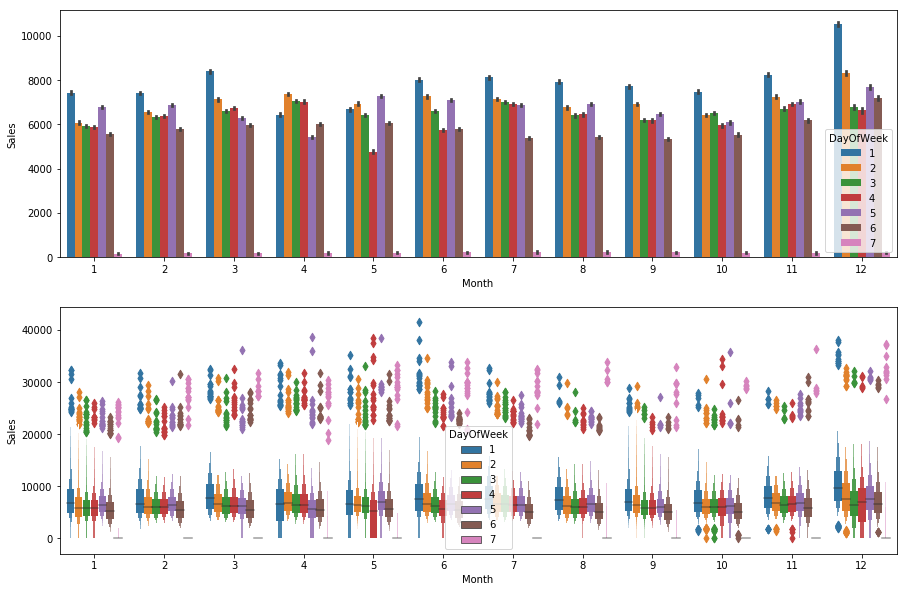

In [52]:
plotter("Month" , "Sales")

## Year vs Sale

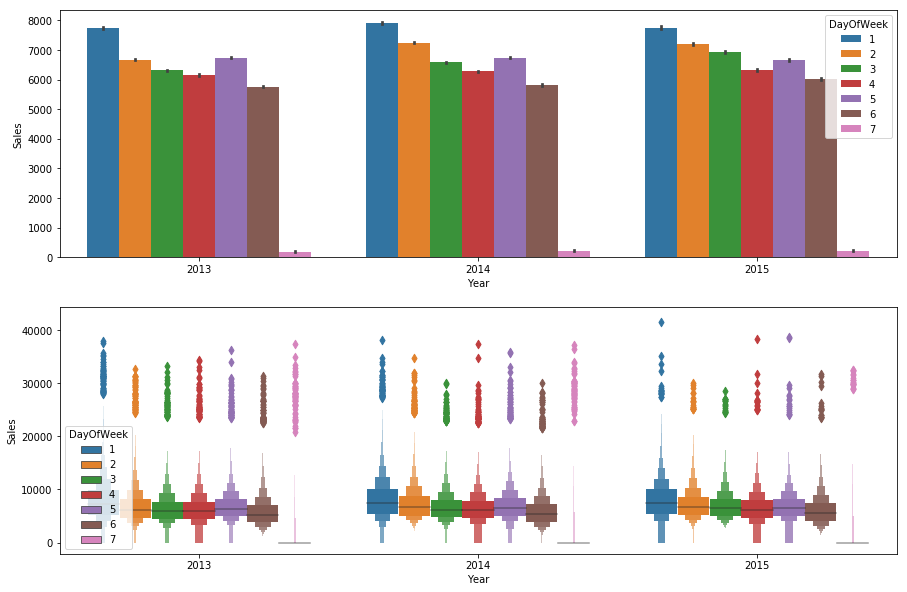

In [55]:
plotter("Year" , "Sales")

c:\users\parag\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\parag\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


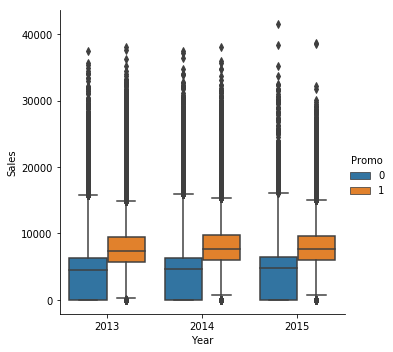

In [98]:
sns.factorplot(x ="Year", y ="Sales", hue ="Promo", data = df_main,
                   size = 5, kind ="box")

## Visualizing the distribution of Sales over years

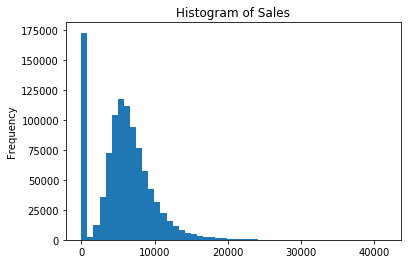

In [70]:
df_main["Sales"].plot(kind='hist',bins=50,x="Sales",title = "Histogram of Sales")


In [5]:
df_main_["StateHoliday"] = df_main_["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

df_main_['StateHoliday'] = df_main_['StateHoliday'].astype(float)


In [46]:
df_main_["year"]=df_main_.Date.apply(year_function)
df_main_["month"]=df_main_.Date.apply(month_function)

In [7]:
df_main_["Day"]=df_main_.Date.apply(lambda x: int(str(x)[8:10]))

In [8]:
df_test_= pd.read_csv('C:/Users/parag/Downloads/Rossmann-Store-Sales-Predictions-master/Rossmann-Store-Sales-Predictions-master/test.csv')

In [9]:
df_test_["year"]=df_test_.Date.apply(year_function)
df_test_["month"]=df_test_.Date.apply(month_function)
df_test_["Day"]=df_test_.Date.apply(lambda x: int(str(x)[8:10]))

In [11]:
df_test_.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,year,month,Day,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,2015,9,17,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,857,1,3,2015-09-16,1.0,1,0,0,2015,9,16,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1713,1,2,2015-09-15,1.0,1,0,0,2015,9,15,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,2569,1,1,2015-09-14,1.0,1,0,0,2015,9,14,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,3425,1,7,2015-09-13,0.0,0,0,0,2015,9,13,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


Creating dummy variables

In [13]:
df_main_ = pd.get_dummies(df_main_,columns=['StoreType','Assortment','year'])
df_test_ = pd.get_dummies(df_test_,columns=['StoreType','Assortment','year'])
df_test_['year_2013']=0
df_test_['year_2014']=0

In [14]:
df_test_.fillna(1, inplace=True)

In [16]:
df_test_.isnull().sum()

Id                           0
Store                        0
DayOfWeek                    0
Date                         0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
month                        0
Day                          0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
StoreType_a                  0
StoreType_b                  0
StoreType_c                  0
StoreType_d                  0
Assortment_a                 0
Assortment_b                 0
Assortment_c                 0
year_2015                    0
year_2013                    0
year_2014                    0
dtype: int64

In [114]:
df_main_.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'month', 'Day', 'log_sales',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'year_2013', 'year_2014', 'year_2015'],
      dtype='object')

In [115]:
df_test_.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'month', 'Day', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a',
       'Assortment_b', 'Assortment_c', 'year_2015', 'year_2013', 'year_2014'],
      dtype='object')

## 4 Sales Prediction <a class="anchor" id="4-bullet"></a>

### 4.1 Data preparation

We are splitting the data into training and testing sets. So we can examine the accuracy of model on out of sample data.
The data is seperated in 80-20 % format. The size of training dataset is ~800k rows rows and testing dataset is ~200K rows.

In [73]:
X = df_main_.drop(['Sales','log_sales','Store','Date','Customers','CompetitionOpenSinceYear','Promo2SinceYear','PromoInterval'] , axis = 1)
y = df_main_['log_sales']

#Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
#y_test = df_test_['Sales']

## 4.2 Linear Regression <a class="anchor" id="4.2-bullet"></a>

Linear regression is a machine learning alogrithm which is used to find linear relation between target and predictor variables. Linear regression are of two types - 
1. Simple Linear Regression
2. Multiple Linear Regression

For this dataset we will use multiple linear regression.Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. 

In [23]:
reg = LinearRegression()
reg.fit(X_train , y_train)
pred = reg.predict(X_test)

In [24]:
rmse = np.sqrt(mean_squared_error(y_test,pred))
print(rmse)

0.3731435568682413


In [27]:
model = Ridge(random_state = 1)

param_grid = {
"alpha" : [0.01 , 0.2 , 0.250 , 0.3,0.5] 
}
grid = GridSearchCV( model , param_grid , cv = 5 , scoring = "neg_mean_squared_error")
grid.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.2, 0.25, 0.3, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [135]:
grid.best_estimator_

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1, solver='auto', tol=0.001)

In [137]:
rmse = np.sqrt(-grid.best_score_)
print(rmse)

0.3752189854615073


### The best result linear regression could yield is at 63 % accurate.

## 4.3 Random Forest <a class="anchor" id="4.3-bullet"></a>

Random Forest is a supervised machine learning alogirthm. The random forest is an ensemble learning method.Ensembles are a divide-and-conquer approach used to improve performance. The main principle behind ensemble methods is that a group of “weak learners” can come together to form a “strong learner”. 

In [74]:
rf = RandomForestRegressor(n_estimators=15,max_depth=8)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [75]:
rf_pred= rf.predict(X_test)

In [76]:
rmse_rf = np.sqrt(mean_squared_error(y_test,rf_pred))
rmse_rf

0.33776607192253

### The random forest algorithm gave 67 % accuracy. The accuracy is calculated for out of sample data.

### <B>Feature importance</B>

Among all the features lets find out which feature are making most impact.

In [77]:
feature_importance_rf = np.argsort(-rf.feature_importances_)

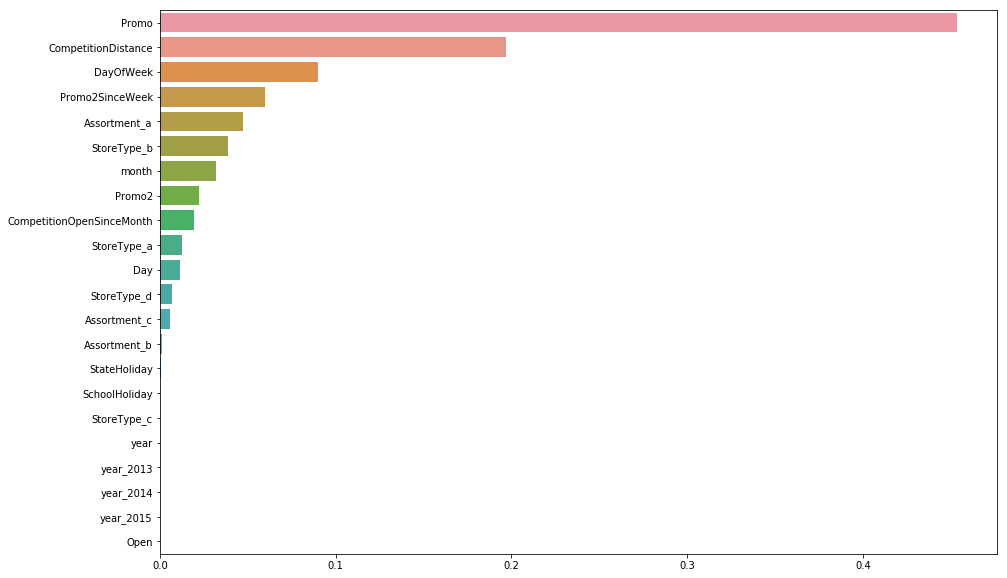

In [78]:
plt.subplots(figsize=(15, 10))
sns.barplot(x=rf.feature_importances_[feature_importance_rf], y=X_train.columns.values[feature_importance_rf], orient='h')

## 4.4 Gradient Boosting <a class="anchor" id="4.4-bullet"></a>

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

In [86]:
# estimator = GradientBoostingRegressor(random_state=123, criterion = 'mse')
# params = {'n_estimators': range(5, 20), 'max_depth': range(5, 25)}

# # grid_search = GridSearchCV(estimator, params).fit(X_train, y_train)
# best_list_max_depth.append(grid_search.best_params_['max_depth'])
# best_list_n_estimators.append(grid_search.best_params_['n_estimators'])

# print ("score", grid.best_score_)
# print ("params", grid.best_params_)

# gsearch1.fit(X_test,y_test)

In [92]:
params = {'n_estimators': 400, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls','criterion':'mse'}
clf = GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [93]:
grad_predict = clf.predict(X_test)
rmse_grad_boost = np.sqrt(mean_squared_error(y_test,grad_predict))
rmse_grad_boost

0.3398487168824251

### The RMSE of gradient boosting is 0.34

In [95]:
feature_importance_grad = np.argsort(-clf.feature_importances_)

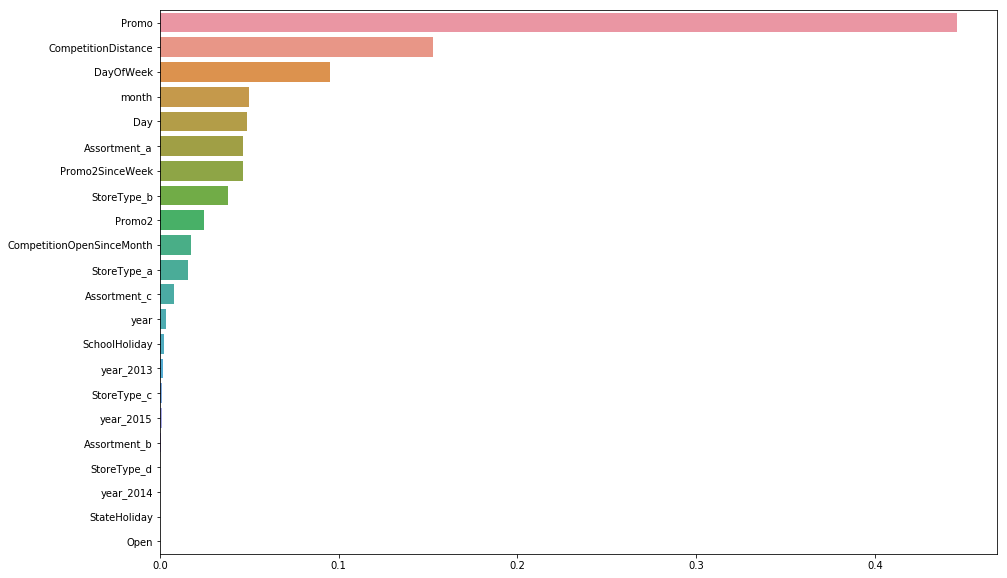

In [96]:
plt.subplots(figsize=(15, 10))
sns.barplot(x=clf.feature_importances_[feature_importance_grad], y=X_train.columns.values[feature_importance_grad], orient='h')

## 4.5 XG Boosting <a class="anchor" id="4.5-bullet"></a>

XGBoost stands for e<B>X</B>treem <B>G</B>radient <b>B</B>oosting. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [16]:
xgboost = XGBRegressor(max_depth=15,n_jobs=4,n_estimators=120,subsample=0.7)
xgboost.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=15, min_child_weight=1, missing=None, n_estimators=120,
       n_jobs=4, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.7)

In [29]:
xgboost_pred = xgboost.predict(X_test)
rmse_xgboost = np.sqrt(mean_squared_error(y_test,xgboost_pred))
rmse_xgboost

0.11026483297226299

In [18]:
#xgboost = XGBRegressor(max_depth=15,n_jobs=4,n_estimators=120,subsample=0.7)
scores = cross_val_score(xgboost, X , y , cv=7)
scores

array([0.21729225, 0.22969481, 0.19336599, 0.14054891, 0.19191668,
       0.16080439, 0.19478089])

### Cross validating the dataset with 7 folds decreased the accuracy by ~3%

Graphical representation of important features according to their importance.

In [20]:
feature_importance = np.argsort(-xgboost.feature_importances_)

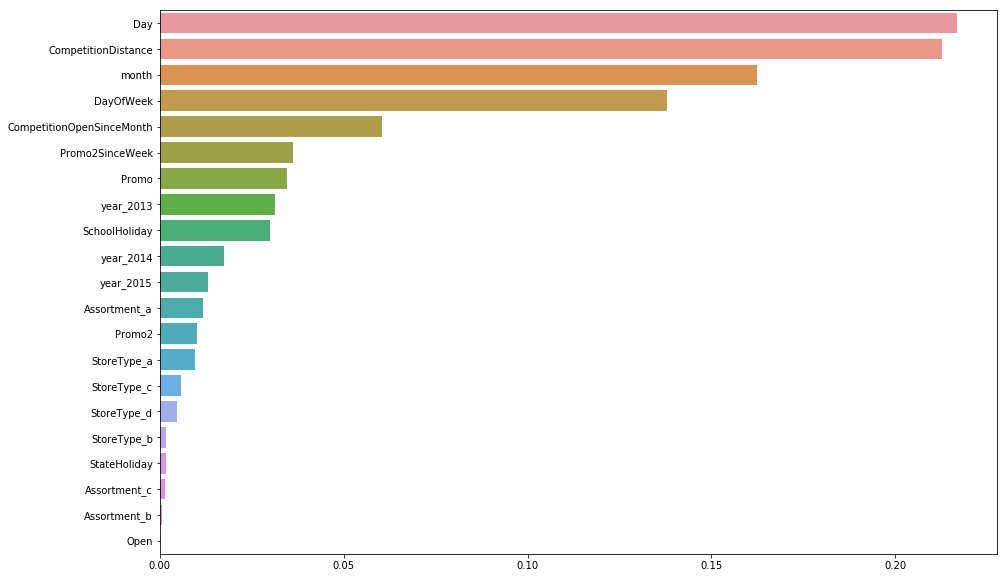

In [26]:
plt.subplots(figsize=(15, 10))
sns.barplot(x=xgboost.feature_importances_[feature_importance], y=X_train.columns.values[feature_importance], orient='h')

## 5 Conclusion <a class="anchor" id="5-bullet"></a>

<h2 style='padding: 10px'>Model Comparision</h2><table class='table table-striped'> 
    <thead> 
        <tr> <th>Number</th> <th>Model Name</th> <th>RMSPE</th> <th>Accuracy</th> </tr> </thead> <tbody> <tr> <th scope='row'>1</th> <td>Linear Regression</td> <td>37.5%</td> <td>63.5%</td> </tr> 
        <tr> <th scope='row'>2</th> <td>Random Forest</td> <td>33.7%</td> <td>67 %</td> </tr> 
        <tr> <th scope='row'>3</th> <td>Gradient Boosting</td> <td>34%</td> <td>64%</td> </tr>
        <tr> <th scope='row'>4</th> <td>XG Boosting</td> <td>11%</td> <td>89%</td> </tr></tbody> </table>

From the above table it is clear that some model could not perform very well. Even though the data was time dependent, we can say that by data wrangling we can apply supervised regression algorithm. After changing the shape of data and sperating some columns it is possible to achieve better accuracy at predicting the dependent variable.
When we compared all the regression models with time series model, it is clear that some models performed well and could yeild accurate result.

## 6 Reference and Citation<a class="anchor" id="6-bullet"></a>

[1] http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm

[2] http://blog.citizennet.com/blog/2012/11/10/random-forests-ensembles-and-performance-metrics

[3] https://en.wikipedia.org/wiki/Gradient_boosting

[4] https://github.com/nikbearbrown/INFO_6105/blob/master/Week_6/NBB_Decision_Trees.ipynb

[5] https://github.com/nikbearbrown/INFO_6105/blob/master/Week_6/NBB_Decision_Trees_Random_Forest.ipynb

[6] https://github.com/nikbearbrown/INFO_6105/blob/master/Week_5/NBB_Linear_Regression.ipynb

[7] https://www.analyticsvidhya.com

[8] https://www.kaggle.com/c/rossmann-store-sales

## License

MIT License

Copyright (c) 2018 paragab

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.